<a href="https://colab.research.google.com/github/steve122192/philly_crime_analysis/blob/master/philly_crime_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('incidents_part1_part2.csv')
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])

In [94]:
df

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
0,129,9,2,2020-03-25 18:32:00,2020-03-25,18:32:00,18,202009012094,1400 BLOCK SPRING GARDEN ST,600,Theft from Vehicle,-75.161446,39.962334,39.962334,-75.161446
1,41,77,A,2020-03-08 19:08:00,2020-03-08,19:08:00,19,202077001196,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
2,42,77,A,2020-03-15 18:41:00,2020-03-15,18:41:00,18,202077001312,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
3,43,77,A,2020-03-18 08:17:00,2020-03-18,08:17:00,8,202077001343,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
4,44,77,A,2020-04-03 15:32:33,2020-04-03,15:32:33,15,202077001460,0 BLOCK PIA WAY,600,Thefts,-75.230706,39.883881,39.883881,-75.230706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103705,5253186,16,2,2020-09-23 11:13:39,2020-09-23,11:13:39,11,202016036076,800 BLOCK N 46TH ST,800,Other Assaults,-75.213683,39.968523,39.968523,-75.213683
103706,3821930,19,1,2020-07-11 00:33:16,2020-07-11,00:33:16,0,202019044845,7200 BLOCK HAVERFORD AV,600,Theft from Vehicle,-75.261351,39.974957,39.974957,-75.261351
103707,4372141,17,3,2020-08-06 13:08:00,2020-08-06,13:08:00,13,202017022625,1900 BLOCK WATKINS ST,1400,Vandalism/Criminal Mischief,-75.177072,39.929892,39.929892,-75.177072
103708,4092171,18,1,2020-07-22 14:47:06,2020-07-22,14:47:06,14,202018052559,5800 BLOCK NORFOLK ST,800,Other Assaults,-75.240107,39.949705,39.949705,-75.240107


In [95]:
df['text_general_code'].value_counts()

Other Assaults                             16710
Thefts                                     15545
All Other Offenses                         13089
Vandalism/Criminal Mischief                10883
Theft from Vehicle                          9420
Fraud                                       6472
Narcotic / Drug Law Violations              5153
Aggravated Assault No Firearm               3987
Motor Vehicle Theft                         3400
Aggravated Assault Firearm                  2723
Burglary Residential                        2636
Weapon Violations                           2364
Burglary Non-Residential                    2267
Robbery No Firearm                          2061
DRIVING UNDER THE INFLUENCE                 1291
Robbery Firearm                             1193
Recovered Stolen Motor Vehicle              1150
Disorderly Conduct                           666
Rape                                         583
Other Sex Offenses (Not Commercialized)      525
Arson               

In [96]:
violent_crimes = ['Aggravated Assault Firearm','Aggravated Assault No Firearm',
                  'Robbery No Firearm','Robbery Firearm','Rape','Arson','Homicide - Criminal']
vehicle_theft =  df[df['text_general_code'] == 'Theft from Vehicle']
gta =  df[df['text_general_code'] == 'Motor Vehicle Theft']
murder =  df[df['text_general_code'] == 'Homicide - Criminal']
rape =  df[df['text_general_code'] == 'Rape']
violent = df[df['text_general_code'].isin(violent_crimes)]

In [97]:
fig = px.histogram(violent, x="text_general_code", title='2020 Violent Crimes - Philly',
                   labels = {'text_general_code': 'Crime Category'})
fig.show()

In [98]:
px.set_mapbox_access_token('pk.eyJ1Ijoic3RldmUxMjIxOTIiLCJhIjoiY2tmcGVsYnJvMDk3MDJ5cHNyOTQzczFhdCJ9.aL5MhnYqYoccWHcTgwRDVg')
fig = px.scatter_mapbox(violent, lat="lat", lon="lng",     color="hour_",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  labels = {'text_general_code': 'Crime'}, hover_data = ['text_general_code'])
fig.show()

In [99]:
rape = rape.sort_values('dispatch_date', axis=0)

In [100]:
rape

,objectid,dc_dist,psa,dispatch_date_time,dispatch_date,dispatch_time,hour_,dc_key,location_block,ucr_general,text_general_code,point_x,point_y,lat,lng
7892,461235,9,1,2020-01-01 07:24:00,2020-01-01,07:24:00,7,202009000050,1400 BLOCK CHANCELLOR ST,200,Rape,-75.165409,39.948841,39.948841,-75.165409
7386,423796,25,2,2020-01-02 18:16:00,2020-01-02,18:16:00,18,202025000403,4600 BLOCK WHITAKER AVE,200,Rape,-75.114290,40.019593,40.019593,-75.114290
14275,877367,1,1,2020-01-03 12:49:00,2020-01-03,12:49:00,12,202001000320,1800 BLOCK S RINGGOLD ST,200,Rape,-75.185981,39.929441,39.929441,-75.185981
2078,123830,2,3,2020-01-03 11:47:00,2020-01-03,11:47:00,11,202002000377,700 BLOCK RHAWN ST,200,Rape,-75.078710,40.074077,40.074077,-75.078710
3366,199776,6,2,2020-01-04 07:13:00,2020-01-04,07:13:00,7,202006000677,0 BLOCK N 9TH ST,200,Rape,-75.154079,39.952549,39.952549,-75.154079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92330,5317671,16,1,2020-09-26 20:43:26,2020-09-26,20:43:26,20,202016036558,3400 BLOCK RACE ST,200,Rape,-75.191521,39.959051,39.959051,-75.191521
70979,5339372,7,1,2020-09-27 13:39:34,2020-09-27,13:39:34,13,202007021273,1900 BLOCK HOFFNAGLE ST,200,Rape,-75.053587,40.065792,40.065792,-75.053587
64078,5346861,39,2,2020-09-28 06:18:42,2020-09-28,06:18:42,6,202039058744,3700 BLOCK N BOUVIER ST,200,Rape,-75.156280,40.011324,40.011324,-75.156280
72842,5376158,2,2,2020-09-29 17:06:00,2020-09-29,17:06:00,17,202002045402,4200 BLOCK E ROOSEVELT BLVD,200,Rape,-75.106317,40.029947,40.029947,-75.106317


In [101]:
rape_counts = rape.groupby('dispatch_date').size().reset_index(name='counts')
rape_counts['total'] = rape_counts['counts'].cumsum()
rape_counts

,dispatch_date,counts,total
0,2020-01-01,1,1
1,2020-01-02,1,2
2,2020-01-03,2,4
3,2020-01-04,4,8
4,2020-01-05,1,9
...,...,...,...
236,2020-09-25,1,578
237,2020-09-26,1,579
238,2020-09-27,1,580
239,2020-09-28,1,581


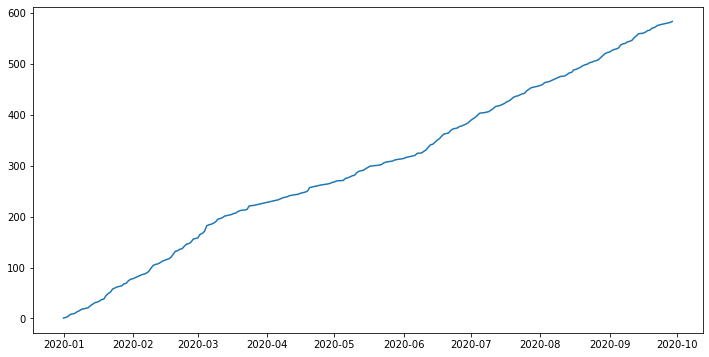

In [105]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(rape_counts['dispatch_date'],rape_counts['total'])
plt.show()

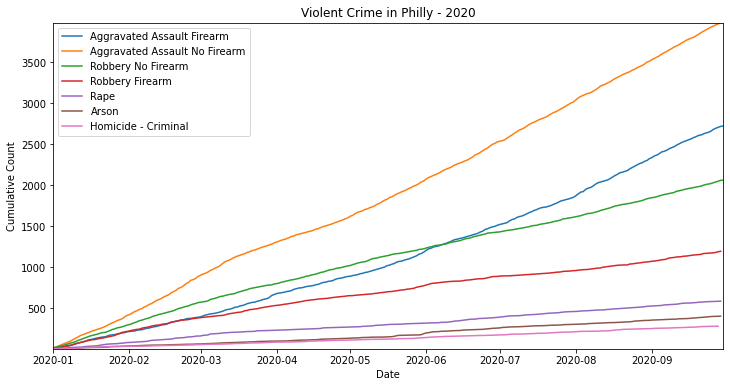

In [133]:
fig, ax = plt.subplots(figsize=(12,6))
for crime in violent_crimes:
  table = df[df['text_general_code'] == crime]
  table = table.sort_values('dispatch_date', axis=0)
  table = table.groupby('dispatch_date').size().reset_index(name='counts')
  table['total'] = table['counts'].cumsum()
  ax.plot(table['dispatch_date'],table['total'], linewidth=1.5, label=crime)
ax.margins(0.0)
ax.legend()
plt.title('Violent Crime in Philly - 2020')
plt.ylabel('Cumulative Count')
plt.xlabel('Date')
plt.show()
plt.close()


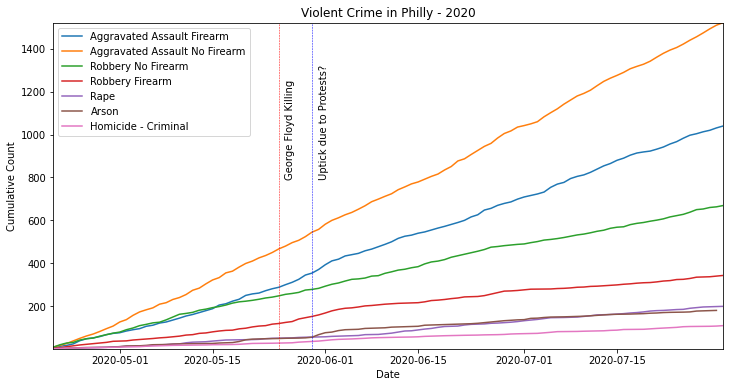

In [162]:
fig, ax = plt.subplots(figsize=(12,6))
for crime in violent_crimes:
  table = df[df['text_general_code'] == crime]
  table = table[(table['dispatch_date'] > '2020-04-20') & (table['dispatch_date'] < '2020-08-01')]
  table = table.sort_values('dispatch_date', axis=0)
  table = table.groupby('dispatch_date').size().reset_index(name='counts')
  table['total'] = table['counts'].cumsum()
  ax.plot(table['dispatch_date'],table['total'], linewidth=1.5, label=crime)
ax.margins(0,0)
ax.legend()  
ax.axvline(x=datetime.date(2020, 5, 25), linestyle='--', color = 'red', linewidth=.5)
ax.axvline(x=datetime.date(2020, 5, 30), linestyle='--', color = 'blue', linewidth=.5)
ax.text(datetime.date(2020, 5, 26),800,'George Floyd Killing',rotation=90)
ax.text(datetime.date(2020, 5, 31),800,'Uptick due to Protests?',rotation=90)
plt.title('Violent Crime in Philly - 2020')
plt.ylabel('Cumulative Count')
plt.xlabel('Date')
plt.show()
plt.close()

In [190]:
columns = ['dispatch_date', 'text_general_code']
df = pd.read_csv('incidents_part1_part2.csv', usecols=columns)
df1 = pd.read_csv('incidents_part1_part2 (1).csv', usecols=columns)
df2 = pd.read_csv('incidents_part1_part2 (2).csv', usecols=columns)
df3 = pd.read_csv('incidents_part1_part2 (3).csv', usecols=columns)
frames = [df,df1,df2,df3]
df = pd.concat(frames)
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'])

In [191]:
murder = df[df['text_general_code'] == 'Homicide - Criminal']
murder

,dispatch_date,text_general_code
38179,2020-04-08,Homicide - Criminal
38180,2020-03-20,Homicide - Criminal
38182,2020-03-21,Homicide - Criminal
38183,2020-01-31,Homicide - Criminal
38184,2020-01-11,Homicide - Criminal
...,...,...
155831,2017-07-18,Homicide - Criminal
155832,2017-03-05,Homicide - Criminal
155833,2017-12-21,Homicide - Criminal
155834,2017-12-28,Homicide - Criminal


In [192]:
murder = murder.sort_values('dispatch_date', axis=0)
murder

,dispatch_date,text_general_code
155167,2017-01-01,Homicide - Criminal
155700,2017-01-02,Homicide - Criminal
155741,2017-01-05,Homicide - Criminal
155163,2017-01-06,Homicide - Criminal
155763,2017-01-06,Homicide - Criminal
...,...,...
76620,2020-09-24,Homicide - Criminal
76350,2020-09-24,Homicide - Criminal
76621,2020-09-24,Homicide - Criminal
81910,2020-09-27,Homicide - Criminal


In [193]:
murder = murder.groupby('dispatch_date').size().reset_index(name='counts')
murder['total'] = murder['counts'].cumsum()
murder

,dispatch_date,counts,total
0,2017-01-01,1,1
1,2017-01-02,1,2
2,2017-01-05,1,3
3,2017-01-06,2,5
4,2017-01-07,2,7
...,...,...,...
722,2020-09-20,2,1111
723,2020-09-21,3,1114
724,2020-09-24,3,1117
725,2020-09-27,1,1118


In [195]:
fb =  murder[['dispatch_date','total']]
fb.rename(columns={'dispatch_date': 'ds', 'total': 'y'}, inplace=True)
fb

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2017-01-01,1
1,2017-01-02,2
2,2017-01-05,3
3,2017-01-06,5
4,2017-01-07,7
...,...,...
722,2020-09-20,1111
723,2020-09-21,1114
724,2020-09-24,1117
725,2020-09-27,1118


In [196]:
!pip install fbprophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


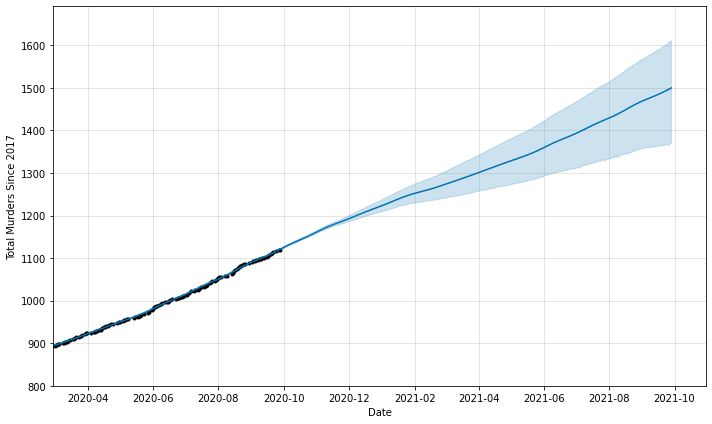

In [215]:
from fbprophet import Prophet
prf=Prophet()
prf.fit(fb)
df_future=prf.make_future_dataframe(periods=365,freq='D')
df_future=prf.predict(df_future)
fig = prf.plot(df_future,xlabel='Date',ylabel='Total Murders Since 2017')
ax = fig.gca()
ax.set_xlim(datetime.date(2020, 2, 29),datetime.date(2021, 10, 30))
ax.set_ylim(800)
ax.margins(-.3,-.3)

plt.show()

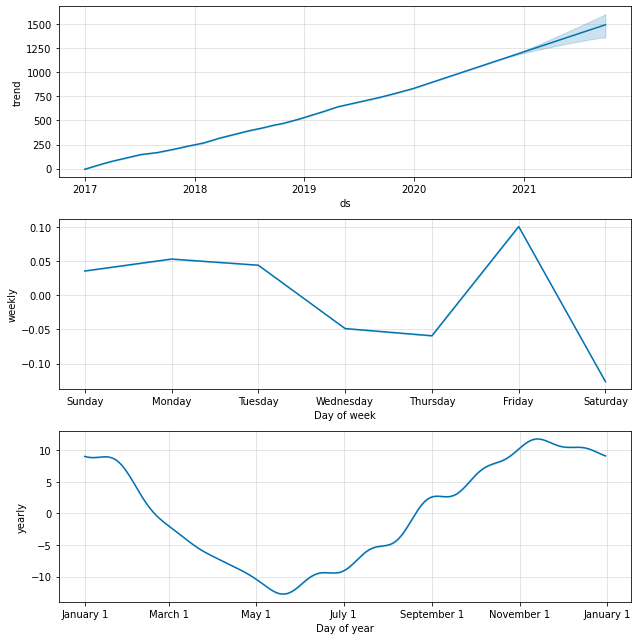

In [216]:
fig = prf.plot_components(df_future)
fig.show()

